In [1]:
'''
Problem Statement
A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have.
Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.


1. Business Problem
1.1. What is the business objective?
Automate the classification of animals into various categories based on specific attributes, which will simplify the task of segregation at the National Zoopark.
Provide a system that can quickly identify and group animals, helping with organizational and operational tasks.

1.2. Are there any constraints?
Model accuracy is important as misclassifications may impact animal management and operations.
Some categories may have limited data points, affecting classification accuracy.
'''

'\nProblem Statement\nA National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have.\nBuild a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.\n\n\n1. Business Problem\n1.1. What is the business objective?\nAutomate the classification of animals into various categories based on specific attributes, which will simplify the task of segregation at the National Zoopark.\nProvide a system that can quickly identify and group animals, helping with organizational and operational tasks.\n\n1.2. Are there any constraints?\nModel accuracy is important as misclassifications may impact animal management and operations.\nSome categories may have limited data points, affecting classification accuracy.\n'

In [4]:
#DATA DICTIONARY
import pandas as pd

data = {
    "Feature": ["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type"],
    "Data Type": ["Object", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer", "Integer"],
    "Relevant to Model": ["No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"],
    "Description": [
        "Name of the animal; used only for identification, not relevant to classification",
        "Indicates presence of hair; useful for distinguishing mammals from other categories",
        "Indicates presence of feathers; useful for identifying birds",
        "Indicates if the animal lays eggs; relevant for differentiating mammals and other classes",
        "Indicates if the animal produces milk; distinguishes mammals",
        "Indicates if the animal can fly; helps classify birds and some insects",
        "Indicates if the animal lives in water; relevant for identifying fish and amphibians",
        "Indicates if the animal is a predator; useful for grouping carnivores and prey",
        "Indicates if the animal has teeth; relevant for identifying mammals and carnivores",
        "Indicates if the animal has a backbone; distinguishes vertebrates from invertebrates",
        "Indicates if the animal breathes air; relevant for grouping amphibians and aquatic species",
        "Indicates if the animal is venomous; useful for identifying specific reptiles and insects",
        "Indicates if the animal has fins; relevant for identifying fish",
        "Number of legs; useful for classifying mammals, reptiles, and other classes",
        "Indicates if the animal has a tail; relevant for grouping mammals, reptiles, and some birds",
        "Indicates if the animal is domesticated; helps separate wild from domesticated species",
        "Indicates if the animal is of a cat-like size; useful for distinguishing smaller predators",
        "Target variable indicating the type of animal category, which we aim to predict"
    ]
}

dict = pd.DataFrame(data)
dict

,Feature,Data Type,Relevant to Model,Description
0,animal_name,Object,No,Name of the animal; used only for identificati...
1,hair,Integer,Yes,Indicates presence of hair; useful for disting...
2,feathers,Integer,Yes,Indicates presence of feathers; useful for ide...
3,eggs,Integer,Yes,Indicates if the animal lays eggs; relevant fo...
4,milk,Integer,Yes,Indicates if the animal produces milk; disting...
5,airborne,Integer,Yes,Indicates if the animal can fly; helps classif...
6,aquatic,Integer,Yes,Indicates if the animal lives in water; releva...
7,predator,Integer,Yes,Indicates if the animal is a predator; useful ...
8,toothed,Integer,Yes,Indicates if the animal has teeth; relevant fo...
9,backbone,Integer,Yes,Indicates if the animal has a backbone; distin...


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [27]:
# Load and inspect the dataset
data = pd.read_csv("Zoo.csv")
data.describe()
data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [9]:
#EDA

In [10]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

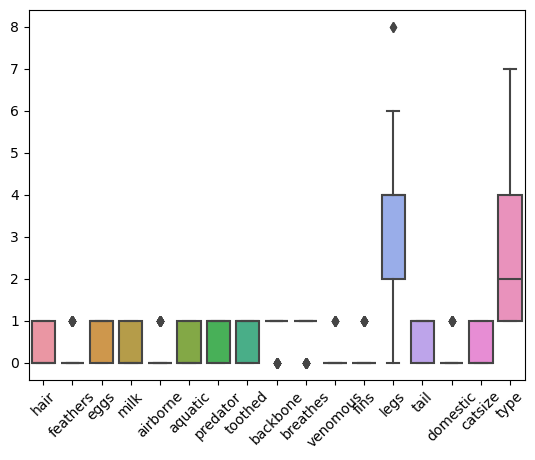

In [28]:
# Visualize data distribution
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [14]:
#data not having much outliers
#lets standardize the data and see

In [15]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [29]:
# Prepare features and target variables
features = data.drop(['animal name', 'type'], axis=1)
target = data['type']

In [30]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled["type"] = target
data_scaled["animal name"] = data["animal name"]

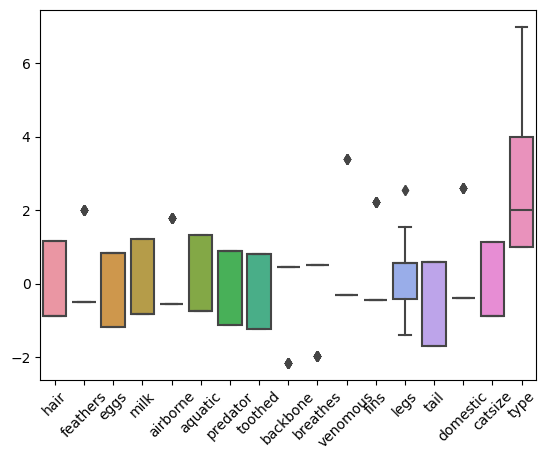

In [31]:
sns.boxplot(data=data_scaled)
plt.xticks(rotation=45)
plt.show()

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [33]:
# Determine the best value for k
acc = []
for i in range(3, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc = np.mean(knn.predict(X_train) == y_train)
    test_acc = np.mean(y_pred == y_test)
    acc.append([train_acc, test_acc])

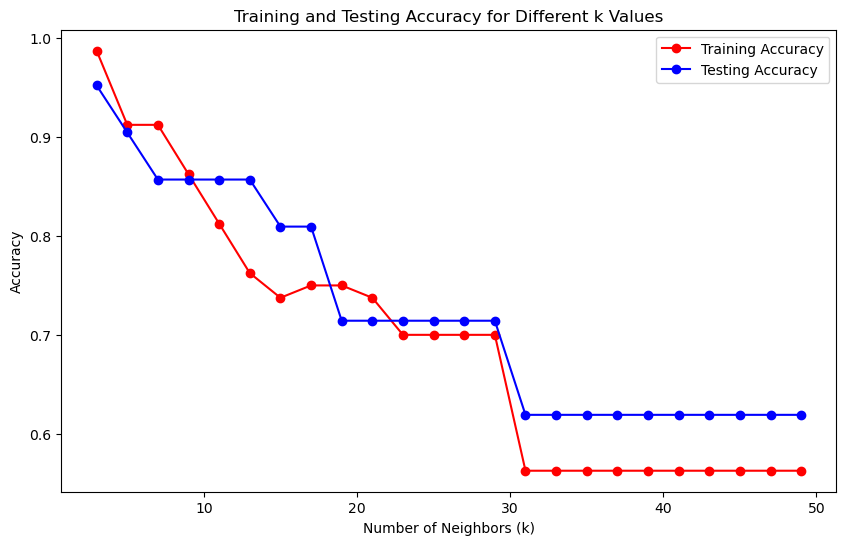

In [34]:
# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(np.arange(3, 50, 2), [i[0] for i in acc], 'ro-', label="Training Accuracy")
plt.plot(np.arange(3, 50, 2), [i[1] for i in acc], 'bo-', label="Testing Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy for Different k Values")
plt.legend()
plt.show()

In [35]:
#accuracy is high for k=5,9

In [36]:
# Build final models with selected k values and evaluate

In [37]:
for k in [5, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.2f}")
    print(f"Confusion Matrix for k={k}:\n{confusion_matrix(y_test, y_pred)}")

Accuracy for k=5: 0.90
Confusion Matrix for k=5:
[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Accuracy for k=9: 0.86
Confusion Matrix for k=9:
[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  0]]


In [38]:
#6.	Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
'''
1.Improved Compatibility By correctly classifying animals, the zoo can ensure that incompatible species are not housed together.
2.The KNN model can provide valuable insights into the relationships between different animal characteristics and their classification.
'''

'\n1.Improved Compatibility By correctly classifying animals, the zoo can ensure that incompatible species are not housed together.\n2.The KNN model can provide valuable insights into the relationships between different animal characteristics and their classification.\n'